In [259]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd

df_raw = pd.read_csv('data/Concrete_Data.csv')
df_raw.columns



Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [260]:
# Select all independent variables.
X = df_raw.iloc[:, :-1]
# Select only the target variable.
y = df_raw.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, # Shuffle the data to avoid bias
                                                   random_state= 50)

# Multiple Linear Regression

In [261]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [262]:
mlr_y_predicted =  mlr_model.predict(X_test)

# Mean Absolute Error
mlr_metric_mae = mean_absolute_error(y_test, mlr_y_predicted)
print(f'Mean Absolute Error {mlr_metric_mae}')

# Mean Absolute Percentage Error
mlr_metric_mape = mean_absolute_percentage_error(y_test, mlr_y_predicted)
print(f'Mean Absolute Percentage Error {mlr_metric_mape}')

# Mean Squared Error
mlr_metric_mse = mean_squared_error(y_test, mlr_y_predicted)
print(f'Mean Squared Error {mlr_metric_mse}')

# Mean Squared Log Error
mlr_metric_msle = mean_squared_log_error(y_test, mlr_y_predicted)
print(f'Mean Squared Log Error {mlr_metric_msle}')

# Root Mean Squared Error
mlr_metric_rmse = np.sqrt(mean_squared_error(y_test, mlr_y_predicted))
print(f'Root Mean Squared Error {mlr_metric_rmse}')

# Explained Variance Score
mlr_metric_evs = explained_variance_score(y_test, mlr_y_predicted)
print(f'Explained Variance Score {mlr_metric_evs}')

# R2 score
mlr_metric_r2 = r2_score(y_test, mlr_y_predicted)
print(f'R Squared Score {mlr_metric_r2}')


Mean Absolute Error 7.9100408151230575
Mean Absolute Percentage Error 0.3338653542629698
Mean Squared Error 98.115811061572
Mean Squared Log Error 0.12016603228350434
Root Mean Squared Error 9.905342551450303
Explained Variance Score 0.6360416556439641
R Squared Score 0.6359646484072214


In [263]:
print(mlr_model.intercept_)
print(mlr_model.coef_)

-8.588336120681141
[ 0.11435239  0.09812924  0.07706773 -0.16950172  0.31739452  0.01450578
  0.01343895  0.11158763]


# Decision Tree Regression (Regression Tree)

In [264]:
regression_model = DecisionTreeRegressor(criterion="squared_error", min_samples_leaf=3, max_depth=10)
regression_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=3)

In [265]:
dtr_y_predicted = regression_model.predict(X_test)

# Mean Absolute Error
dtr_metric_mae = mean_absolute_error(y_test, dtr_y_predicted)
print(f'Mean Absolute Error {dtr_metric_mae}')

# Mean Absolute Percentage Error
dtr_metric_mape = mean_absolute_percentage_error(y_test, dtr_y_predicted)
print(f'Mean Absolute Percentage Error {dtr_metric_mape}')

# Mean Squared Error
dtr_metric_mse = mean_squared_error(y_test, dtr_y_predicted)
print(f'Mean Squared Error {dtr_metric_mse}')

# Mean Squared Log Error
dtr_metric_msle = mean_squared_log_error(y_test, dtr_y_predicted)
print(f'Mean Squared Log Error {dtr_metric_msle}')

# Root Mean Squared Error
dtr_metric_rmse = np.sqrt(mean_squared_error(y_test, dtr_y_predicted))
print(f'Root Mean Squared Error {dtr_metric_rmse}')

# Explained Variance Score
dtr_metric_evs = explained_variance_score(y_test, dtr_y_predicted)
print(f'Explained Variance Score {dtr_metric_evs}')

# R2 score
dtr_metric_r2 = r2_score(y_test, dtr_y_predicted)
print(f'R Squared Score {dtr_metric_r2}')


Mean Absolute Error 5.156521679675626
Mean Absolute Percentage Error 0.18919091845375452
Mean Squared Error 46.73019674579919
Mean Squared Log Error 0.05448907595003888
Root Mean Squared Error 6.835948854826167
Explained Variance Score 0.8272897330573561
R Squared Score 0.826618733328502


#  K-Nearest Neighbors (KNN)

Optimal hyperparameter k 3


<Figure size 640x480 with 0 Axes>

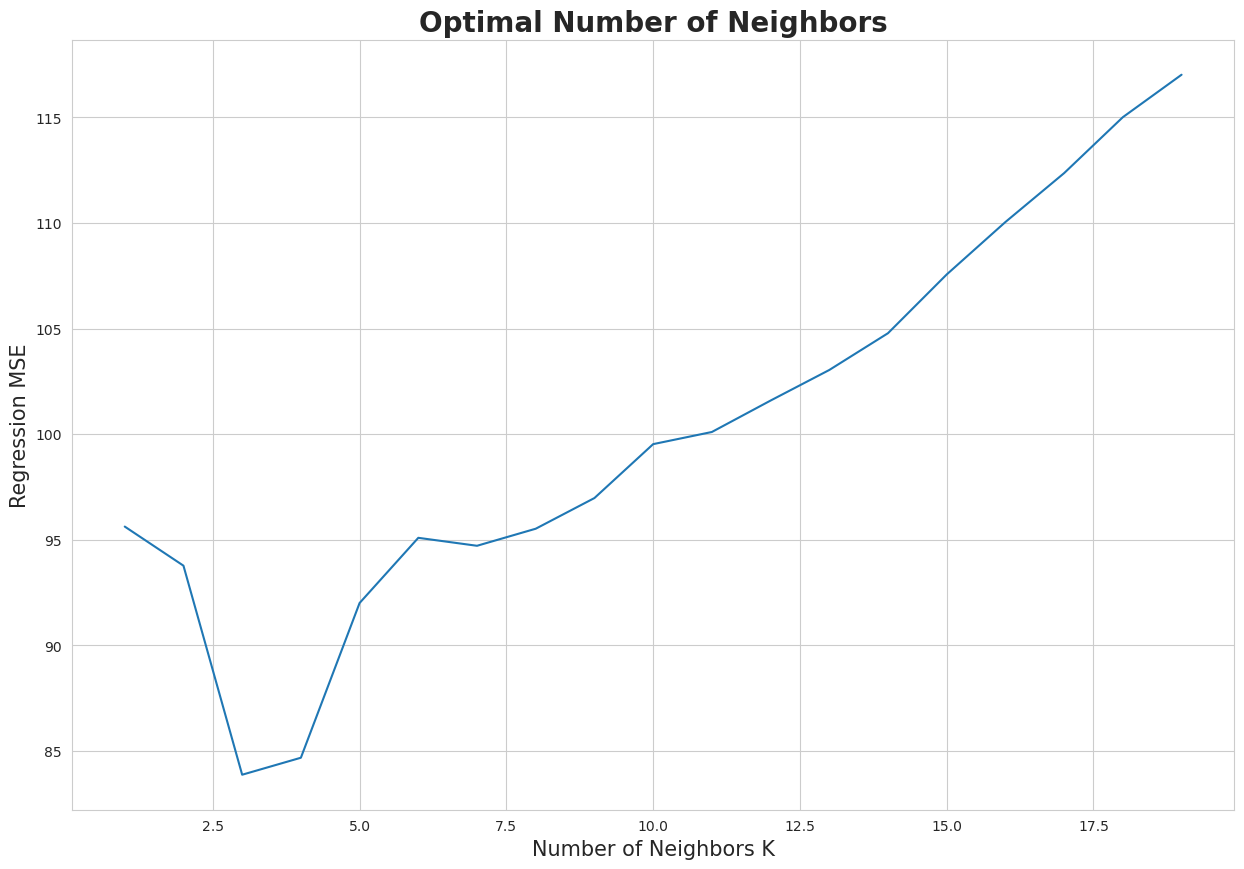

In [266]:
# Creating list of K for KNN
k_list = list(range(1, 20))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

knn_cv_mse = [1 - x for x in cv_scores]
print(f'Optimal hyperparameter k {np.argmin(knn_cv_mse) + 1}') # +1 is because array index is 0 based

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Optimal Number of Neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Regression MSE', fontsize=15)
sb.set_style("whitegrid")
plt.plot(k_list, knn_cv_mse)

plt.show()


In [267]:
knn = KNeighborsRegressor(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [268]:
knn_y_predicted = knn.predict(X_test)

# Mean Absolute Error
knn_metric_mae = mean_absolute_error(y_test, knn_y_predicted)
print(f'Mean Absolute Error {knn_metric_mae}')

# Mean Absolute Percentage Error
knn_metric_mape = mean_absolute_percentage_error(y_test, knn_y_predicted)
print(f'Mean Absolute Percentage Error {knn_metric_mape}')

# Mean Squared Error
knn_metric_mse = mean_squared_error(y_test, knn_y_predicted)
print(f'Mean Squared Error {knn_metric_mse}')

# Mean Squared Log Error
knn_metric_msle = mean_squared_log_error(y_test, knn_y_predicted)
print(f'Mean Squared Log Error {knn_metric_msle}')

# Root Mean Squared Error
knn_metric_rmse = np.sqrt(mean_squared_error(y_test, knn_y_predicted))
print(f'Root Mean Squared Error {knn_metric_rmse}')

# Explained Variance Score
knn_metric_evs = explained_variance_score(y_test, knn_y_predicted)
print(f'Explained Variance Score {knn_metric_evs}')

# R2 score
knn_metric_r2 = r2_score(y_test, knn_y_predicted)
print(f'R Squared Score {knn_metric_r2}')

Mean Absolute Error 6.781504854368932
Mean Absolute Percentage Error 0.29333246627467285
Mean Squared Error 81.49366370010787
Mean Squared Log Error 0.11228844870844386
Root Mean Squared Error 9.027384100618953
Explained Variance Score 0.7043400833784348
R Squared Score 0.6976371677849624


In [269]:
results = {
    'MLR': [mlr_metric_mae, mlr_metric_mape, mlr_metric_mse, mlr_metric_msle, mlr_metric_rmse, mlr_metric_evs, mlr_metric_r2],
    'DTR': [dtr_metric_mae, dtr_metric_mape, dtr_metric_mse, dtr_metric_msle, dtr_metric_rmse, dtr_metric_evs, dtr_metric_r2],
    'KNN': [knn_metric_mae, knn_metric_mape, knn_metric_mse, knn_metric_msle, knn_metric_rmse, knn_metric_evs, knn_metric_r2]}

results_df = pd.DataFrame(results).set_axis(
    ['Mean Absolute Error', 'Mean Absolute Percentage Error', 'Mean Squared Error', 'Mean Squared Log Error',
     'Root Mean Squared Error', 'Explained Variance Score', 'R Squared Score'])

print(results_df)

                                      MLR        DTR        KNN
Mean Absolute Error              7.910041   5.156522   6.781505
Mean Absolute Percentage Error   0.333865   0.189191   0.293332
Mean Squared Error              98.115811  46.730197  81.493664
Mean Squared Log Error           0.120166   0.054489   0.112288
Root Mean Squared Error          9.905343   6.835949   9.027384
Explained Variance Score         0.636042   0.827290   0.704340
R Squared Score                  0.635965   0.826619   0.697637
